In [1]:
#install citypy. helps us to get the nearest city 
!pip install citipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
#from scipy bring in only the linregress
from scipy.stats import linregress
from api_keys import weather_api_key

In [3]:
#generate a list of city names
from citipy import citipy 
city_names = []
#create random latitudes and longitudes. 1300 random numbers from -90 to 90
latitudes = np.random.uniform(-90,90,size = 1300)
longitudes = np.random.uniform(-180,180,size = 1300)
#put these together into coordinates 
coordinates = zip(latitudes, longitudes)
#coordinates
for coordinate in coordinates:
    #print(coordinate[0])
    #print(coordinate[1])
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #print(city)
    if city not in city_names:
        #we do not want the same city twice in the list
        city_names.append(city)

In [4]:
print (len (city_names))

563


In [5]:
#create lists
temperature = []
windspeed = []
humidity = []
clouds = []
latitude = []
longitude = []
date = []
country = []
cities = []

In [6]:
url = f'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}'
#loop through the cities
for city in city_names:
    #take url above. take url and add another parameter name q which will be equal to the city
    # we want to ignore cities that have no weather
    try: 
        cityurl = url + '&q='+city
        #make a request for each city
        weather = requests.get(cityurl).json()
        #here we are geting the weather for each city. 
        #we need to use information from Open weather (https://openweathermap.org/current) 
        #and find where it says JSON
        windspeed.append(weather['wind']['speed'])
        temperature.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity']) 
        clouds.append(weather['clouds']['all'])
        latitude.append(weather['coord']['lat'])
        longitude.append(weather['coord']['lon']) 
        date.append(weather['dt'])
        country.append(weather['sys']['country']) 
        #append lists whatever is in parenthesis
        cities.append(city)
        print(city) 
    except:
        print('could not find'+city)

rikitea
zhezkazgan
yellowknife
huangchuan
new norfolk
ngunguru
kapaa
verkhnyaya inta
sao filipe
okhotsk
cape town
guerrero negro
hobyo
could not findbarentsburg
yaan
loikaw
jamestown
albany
could not findjiddah
clyde river
celestun
yumen
ribeira grande
araouane
teguldet
ushuaia
bagdarin
liverpool
alyangula
hermanus
could not findijaki
victoria
fomboni
punta arenas
atuona
zhanakorgan
could not findumm durman
salas
could not findattawapiskat
shirgaon
atar
saskylakh
lavrentiya
mataura
traiguen
chuy
could not findchagda
ust-maya
mehamn
hilo
could not findgrand river south east
could not findtaolanaro
tupik
iqaluit
te anau
niigata
alice springs
wabag
hithadhoo
shenjiamen
karratha
bluff
mayumba
haines junction
margate
vostok
petropavlovsk-kamchatskiy
minsk
nuqui
codrington
pilar
ponta do sol
hobart
port alfred
busselton
broome
pisco
pangnirtung
bodden town
port hedland
could not findilloqqortoormiut
muros
havre-saint-pierre
geraldton
kavieng
cherskiy
nemuro
abakaliki
airai
kodiak
barrow
high

In [7]:
city_pd = pd.DataFrame({'city': cities,
                       'latitude': latitude,
                       'longitude': longitude,
                       'temperature': temperature,
                       'windspeed': windspeed,
                       'country': country,
                       'date': date,
                       'clouds': clouds,
                       'humidity': humidity})
city_pd

,city,latitude,longitude,temperature,windspeed,country,date,clouds,humidity
0,rikitea,-23.12,-134.97,73.33,13.44,PF,1603194851,13,78
1,zhezkazgan,47.80,67.71,59.02,6.98,KZ,1603194851,0,24
2,yellowknife,62.46,-114.35,25.00,5.01,CA,1603194851,83,79
3,huangchuan,32.13,115.04,61.03,3.00,CN,1603194851,100,70
4,new norfolk,-42.78,147.06,54.00,2.57,AU,1603194852,89,67
...,...,...,...,...,...,...,...,...,...
505,grand gaube,-20.01,57.66,80.01,13.00,MU,1603194758,0,63
506,tatawin,32.93,10.45,75.20,4.70,TN,1603194951,0,33
507,port augusta,-32.50,137.77,69.80,3.36,AU,1603194774,90,49
508,calabozo,8.92,-67.43,76.91,3.31,VE,1603194951,81,93


In [8]:
#this below saves the dataframe city_pd as a csv file
city_pd.to_csv('Cities.csv')

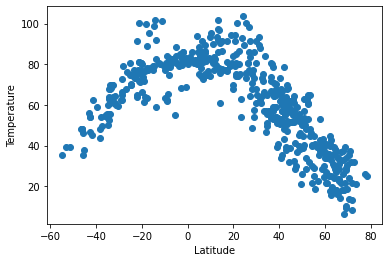

In [9]:
plt.scatter(city_pd['latitude'], city_pd['temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('latitude_temperature.png')
plt.show()
#Expanaltion of scatter plot: temperature is higher as you approach the equator. This is a non linear relationship

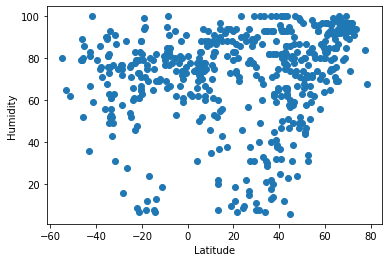

In [10]:
plt.scatter(city_pd['latitude'], city_pd['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#This below saves the scatter plots as PNG
plt.savefig('latitude_humidity.png')
plt.show()
#Expanaltion of scatter plot: There is no linear relationship in humidity from city to city. At equator humidity startrs from about 25 and above

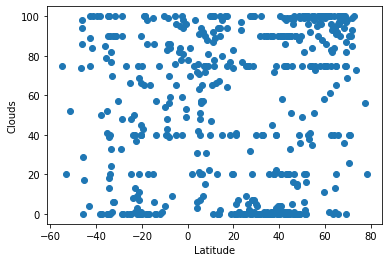

In [11]:
plt.scatter(city_pd['latitude'], city_pd['clouds'])
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.savefig('latitude_clouds.png')
plt.show()
#Expanaltion of scatter plot: There is no relationship amopng cities 

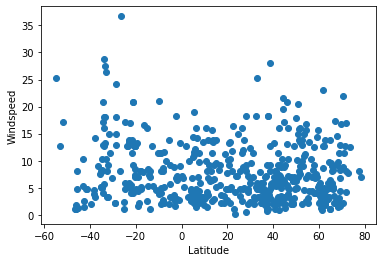

In [12]:
plt.scatter(city_pd['latitude'], city_pd['windspeed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('latitude_windspeed.png')
plt.show()
#Expanaltion of scatter plot: There is no relationship amopng cities 

In [13]:
northern = city_pd.loc[city_pd['latitude']>0]
southern = city_pd.loc[city_pd['latitude']<0]

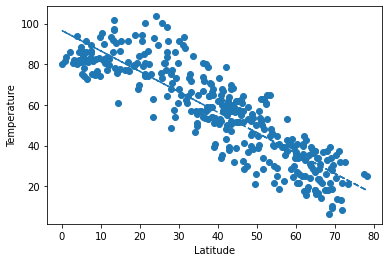

In [14]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(northern["latitude"], northern['temperature'])
m_fit = m_slope * northern["latitude"] + m_int
plt.scatter(northern["latitude"],northern['temperature'])
plt.plot(northern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Temperature')
#print to screen
plt.savefig('latitude_temperature.png')
plt.show()
#There is a negative linear relationship

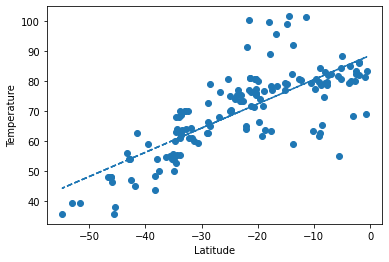

In [15]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(southern["latitude"], southern['temperature'])
m_fit = m_slope * southern["latitude"] + m_int
plt.scatter(southern["latitude"],southern['temperature'])
plt.plot(southern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Temperature')
plt.savefig('latitude_temperature.png')
#print to screen
plt.show()
#There is a positive linear relation

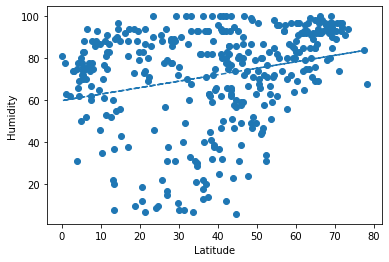

In [16]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(northern["latitude"], northern['humidity'])
m_fit = m_slope * northern["latitude"] + m_int
plt.scatter(northern["latitude"],northern['humidity'])
plt.plot(northern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Humidity')
plt.savefig('latitude_humidity.png')
#print to screen
plt.show()
#There is a no linear relation

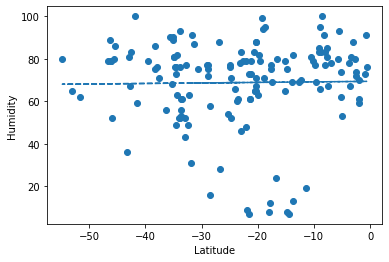

In [17]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(southern["latitude"], southern['humidity'])
m_fit = m_slope * southern["latitude"] + m_int
plt.scatter(southern["latitude"],southern['humidity'])
plt.plot(southern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Humidity')
plt.savefig('latitude_humidity.png')
#print to screen
plt.show()
#There is a no linear relation

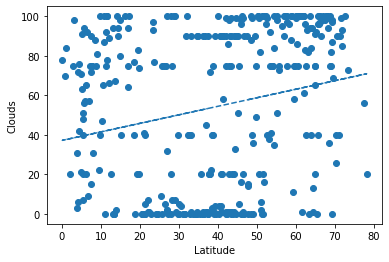

In [18]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(northern["latitude"], northern['clouds'])
m_fit = m_slope * northern["latitude"] + m_int
plt.scatter(northern["latitude"],northern['clouds'])
plt.plot(northern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Clouds')
plt.savefig('latitude_clouds.png')
#print to screen
plt.show()
#There is a no linear relation

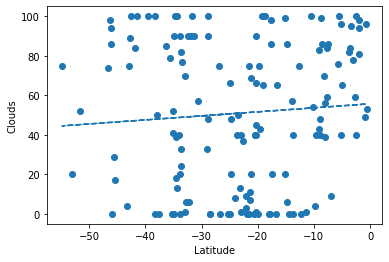

In [19]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(southern["latitude"], southern['clouds'])
m_fit = m_slope * southern["latitude"] + m_int
plt.scatter(southern["latitude"],southern['clouds'])
plt.plot(southern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Clouds')
plt.savefig('latitude_clouds.png')
#print to screen
plt.show()
#There is a no linear relation

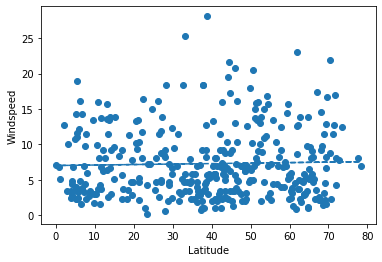

In [20]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(northern["latitude"], northern['windspeed'])
m_fit = m_slope * northern["latitude"] + m_int
plt.scatter(northern["latitude"],northern['windspeed'])
plt.plot(northern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Windspeed')
plt.savefig('latitude_windspeed.png')
#print to screen
plt.show()
#There is a no linear relation

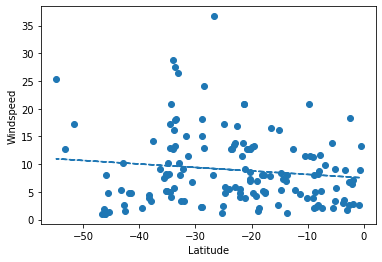

In [21]:
#Correlation and Regresssion
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
m_slope, m_int, m_r, m_p, m_std_err = linregress(southern["latitude"], southern['windspeed'])
m_fit = m_slope * southern["latitude"] + m_int
plt.scatter(southern["latitude"],southern['windspeed'])
plt.plot(southern['latitude'],m_fit,"--")
#plot x-axis
plt.xlabel('Latitude')
# y axis plot
plt.ylabel('Windspeed')
plt.savefig('latitude_windspeed.png')
#print to screen
plt.show()
#There is a no linear relation